<a href="https://www.kaggle.com/code/lxlz1986/per-capita-income-prediction?scriptVersionId=145884206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Contents
 1. [Introduction](#1.-Introduction) 
 2. [Get the Data and Explore the Dataset](#2.-Get-the-Data-and-Explore-the-Dataset)
 3. [Data Visualization and Analysis](#3.-Data-Visualization-and-Analysis)
 4. [Model Trainning](#4.-Model-Trainning)
 5. [Model Validation](#5.-Model-Validation)
 6. [Prediction Visualization](#6.-Prediction-Visualization)

*************************************************************************************************

## 1. Introduction
In this project, we will use a simple dataset to learn how to complete a machine learning project with the guide of machine learning pipeline and the following diagrams shows the components that make up a typical machine learning pipeline.  
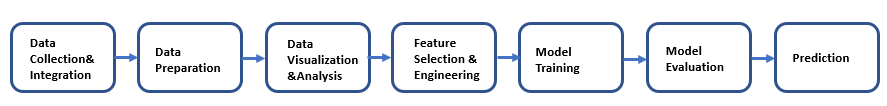

The goal of the project is to use available features in a dataset to make predictions. 

The models we used here are two regression models: **Linear Regression** and **Polynomial Regression**, and both of them are the basic and important machine learning models.  

### About the Dataset
The pubic dataset [Canada_per_capita_income](https://www.kaggle.com/datasets/amalab182/canada-per-capita-income) provides the average income per capita over a specific period(from 1970 to 2016) in Canada and includes totally 47 rows and 2 columns: **year** and **income**. The information contained in this dataset can help people better understand the economic trends in Canada.


After Exporing the dataset we will find that this dataset in practice could not prodive sufficient information to predict the income, since only the single feature **year** cannot determin the **income**, or income is not much relevant to the years number. However, it is still a good example to demonstrate the machine learning pipeline and how to train a Linear Regression model in Scikit-Learn at the beginning. 

*************************************************************************************************

## 2. Get the Data and Explore the Dataset

In [1]:
# import necessary python packages

import pandas as pd
import numpy as np


# import matplotlib package
import matplotlib.pyplot as plt


# import relevant machine learninging packages from Scikit-Learn
from sklearn.model_selection import train_test_split # dataset splitting
from sklearn.linear_model import LinearRegression # Linear Regression model
from sklearn.metrics import mean_squared_error # evaluation metric Mean Squared Error(MSE)
from sklearn.preprocessing import PolynomialFeatures # feature extending in Polynomia Regression model
from sklearn.model_selection import cross_val_score # cross-validation model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Import the dataset [Canada_per_capita_income](https://www.kaggle.com/datasets/amalab182/canada-per-capita-income) into a DataFrame **capita_GDP**.

In [2]:
capita_GDP = pd.read_csv('/kaggle/input/canada-per-capita-income/Canada_per_capita_income.csv')

Explore dataset using `info()` function to get the general infomation about the datasest, such as the number of rows, columns and data type in each column.

In [3]:
capita_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


Look at the first 5 records in the dataset to get the first impression of the data.

In [4]:
capita_GDP.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


## 3. Data Visualization and Analysis

Since there are only two columns in the dataset, in order to have a big picture of the dataset and relationship among data, we can plot the dataset with the help of `matlibplot` library. 

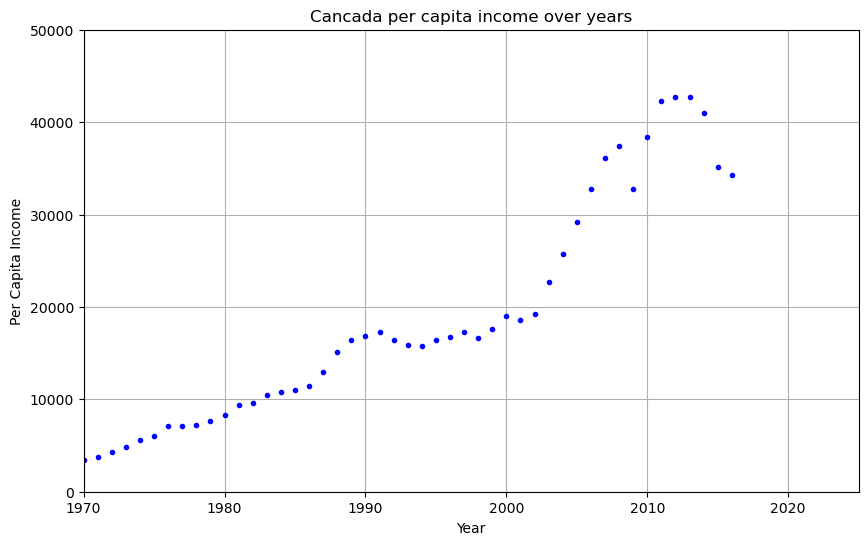

In [5]:
plt.figure(figsize=(10, 6)) # set figure size
plt.plot(capita_GDP["year"], capita_GDP["income"], 'b.') # plot 'income' vs.'year'
plt.title('Cancada per capita income over years') # add figure title
plt.xlabel("Year") # add x-axis label
plt.ylabel("Per Capita Income") # add y-axis label
plt.axis([1970,2025,0,50000])# set axis range
plt.grid(True)# show grid in the figure
plt.show()

From the figure we find that, the relationship between **income** and **year** is not ideal linear. In order to predict income for future, we can try to train both Linear Regression model and Polynommial Regression model and compare the model performance to select the model that best fits the dataset.

## 4. Model Trainning
### 4.1 Choosing prediction target and features

In [6]:
# Chose column income as prediction target y
y = capita_GDP[['income']]

# Chose column year as Feature X
X= capita_GDP[['year']]

### 4.2 Data splitting
Hier we need to splite the dataset into training dataset to train the model and test dataset to validate/evaluate the trained model. We will typically choose 20% of the data for validation and the rest for training purpose. For the application of parameter *random_state* please reference [Discover random_state in train_test_split](https://www.kaggle.com/code/lxlz1986/discover-random-state-in-train-test-split)

In [7]:
# Split the data randomly into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3 Model training using Linear Regression and Polymonial Regression

We first train the Linear Regression model using training data. For an introduction about Linear Regression, please reference [Linear Regression Model in Scikit-Learn](https://www.kaggle.com/code/lxlz1986/linear-regression-model-in-scikit-learn).

In [8]:
# Perform Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train) # model training using training dataset
linear_reg_model.intercept_, linear_reg_model.coef_ # check the bais term and feature weight in the trained model

(array([-1605560.19879643]), array([[815.14251301]]))

Before we train a Polynomia Regression model, we need to extend the features in the original dataset and then use the extended features to train a Linear Regression model. For fundamentals about Polynomial Regression in Scikit-Learn, please reference [Polynomial Regression in Scikit-Learn](https://www.kaggle.com/code/lxlz1986/polynomial-regression-in-scikit-learn).

In [9]:
# Extend features
poly_features = PolynomialFeatures(degree = 2) # degree = 2 means that the extended feature is the square of the original feature x
X_poly_train = poly_features.fit_transform(X_train) # convert to new features

# Use extended features to train linear regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)


LinearRegression()

## 5. Model Validation
When we trained a model, we want to know how good it is, so we need to measure the quality of model. Here we evaluate the model performance using metrics **Mean Squared Error(MSE)** and **Root Mean Squared Error(RMSE)**.

In [10]:
# Evaluate Linear Regression model
y_linear_reg = linear_reg_model.predict(X_test)
linear_reg_mse = mean_squared_error(y_test,y_linear_reg) # use target values in test dataset and predictions to compute MSE
linear_reg_rmse = np.sqrt(linear_reg_mse)

# Evaluate Polynomial Regression model
X_poly_test = poly_features.fit_transform(X_test)
y_poly_reg = poly_reg_model.predict(X_poly_test)
poly_reg_mse = mean_squared_error(y_test, y_poly_reg)
poly_reg_rmse = np.sqrt(poly_reg_mse)

print("Evaluation of Linear Regression Model")
print("Mean Squared Error(MSE):", linear_reg_mse)
print("Root Mean Squared Error(RMSE):", linear_reg_rmse)

print("\nEvaluation of Polynommial Regression Model")
print("Mean Squared Error(MSE):", poly_reg_mse)
print("Root Mean Squared Error(RMSE):", poly_reg_rmse)

Evaluation of Linear Regression Model
Mean Squared Error(MSE): 15147815.5477862
Root Mean Squared Error(RMSE): 3892.0194690913613

Evaluation of Polynommial Regression Model
Mean Squared Error(MSE): 6257614.352141869
Root Mean Squared Error(RMSE): 2501.5224068838297


### Cross-Validation
Since our dataset is small, the cross-validation could be a better way to measure both Linear and Polynomial model quality, which can reduce the randomness in determining model quality.
So we will apply a 5-folds cross-validation on both models with help of `cross_val_score` in Scikit-Learn.

In [11]:
# compute the 5-folds cross-validation score of Linear Regression model
linear_reg_scores = cross_val_score(linear_reg_model,X,y,
                                   scoring = 'neg_mean_squared_error',cv = 5)
linear_reg_rmse = np.sqrt(-linear_reg_scores)


# compute the 5-folds cross-validation score of Polynomial Regression model
X_ploy = poly_features.fit_transform(X)
poly_reg_scores = cross_val_score(poly_reg_model,X_ploy,y,
                                   scoring = 'neg_mean_squared_error',cv = 5)
ploy_reg_rmse = np.sqrt(-poly_reg_scores)

In [12]:
# define a function to display the various scores of the measure metrics
def display_score(scores):
    print("RMSE Scores:",scores)
    print('Mean:', scores.mean())
    print('Standard deviation:',scores.std())

In [13]:
print('Cross-validation scores of Linear Regression model:')
display_score(linear_reg_rmse)

print('\nCross-validation scores of Polynomial Regression model:')
display_score(ploy_reg_rmse)

Cross-validation scores of Linear Regression model:
RMSE Scores: [5683.87053182  883.08261298 4517.91260028 5654.02235474 9612.63270767]
Mean: 5270.3041614978065
Standard deviation: 2792.4147247363408

Cross-validation scores of Polynomial Regression model:
RMSE Scores: [3386.33592295 2078.01276096 2534.50122287 4486.88425662 6002.65005961]
Mean: 3697.6768446022106
Standard deviation: 1414.8478576432717


## 6. Prediction Visualization
In this step, we'd like to use trained model to predict all target values in the original dataset to see how well the model could fit the dataset.

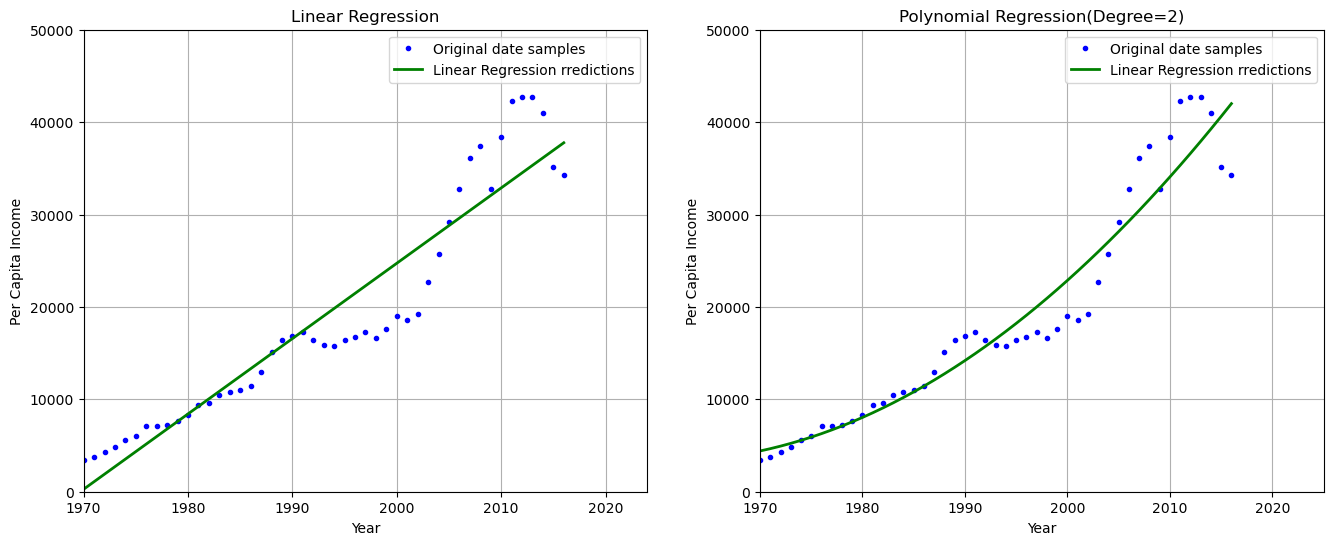

In [14]:
fig,ax = plt.subplots(1,2,figsize=(16, 6))

# plot the results of Linear Regression
y_linear_reg = linear_reg_model.predict(X)
ax[0].plot(X, y, "b.",label = "Original date samples") # plot 'income' vs.'year'
ax[0].plot(X,y_linear_reg,"g-",linewidth=2, label = "Linear Regression rredictions")
ax[0].axis([1970,2024,0,50000])
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Per Capita Income")
ax[0].set_title("Linear Regression")
ax[0].legend()
ax[0].grid(True)



# plot the results of Linear Regression
X_poly = poly_features.fit_transform(X)
y_poly_reg = poly_reg_model.predict(X_poly)
ax[1].plot(X, y, "b.",label = "Original date samples") # plot 'income' vs.'year'
ax[1].plot(X,y_poly_reg,"g-",linewidth=2, label = "Linear Regression rredictions")
ax[1].axis([1970,2025,0,50000])
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Per Capita Income")
ax[1].set_title("Polynomial Regression(Degree=2)")
ax[1].legend()
ax[1].grid(True)

From the above comparisions we can see that, the Polynomial Regression can better fit the original dataset and the RMSE and deviation of RMSE in Polynomial Regression are much smaller than that in Linear Regression.